In [1]:
%%html
<h2>Keras によるコーディング</h2>
<ul>
  <li>drop 0.5</li>
  <li>activation: relu</li>
  <li>hidden layer: 3</li>
  <li>early stopping</li>
</ul>

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(123)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 30000  # MNISTの一部を使う
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
X = X / 255.0
X = X - X.mean(axis=1).reshape(len(X), 1)
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=N_train)
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=N_validation)

'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hiddens = [200, 200, 200]
n_out = len(Y[0])  # 10
p_keep = 0.5
activation = 'relu'


def weight_variable(shape, name=None):
    return np.sqrt(2.0 / shape[0]) * np.random.normal(size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(Activation(activation))
    model.add(Dropout(p_keep))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

'''
モデル学習
'''
epochs = 200
batch_size = 200

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])


'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

Using TensorFlow backend.


Train on 16000 samples, validate on 4000 samples
Epoch 1/200
16000/16000 [==============================] - 1s - loss: 1.5401 - acc: 0.4739 - val_loss: 0.5511 - val_acc: 0.8525
Epoch 2/200
16000/16000 [==============================] - 1s - loss: 0.6692 - acc: 0.7856 - val_loss: 0.3404 - val_acc: 0.9035
Epoch 3/200
16000/16000 [==============================] - 1s - loss: 0.4988 - acc: 0.8536 - val_loss: 0.2690 - val_acc: 0.9188
Epoch 4/200
16000/16000 [==============================] - 1s - loss: 0.4050 - acc: 0.8820 - val_loss: 0.2379 - val_acc: 0.9315
Epoch 5/200
16000/16000 [==============================] - 1s - loss: 0.3597 - acc: 0.8951 - val_loss: 0.2254 - val_acc: 0.9357
Epoch 6/200
16000/16000 [==============================] - 1s - loss: 0.3194 - acc: 0.9091 - val_loss: 0.2013 - val_acc: 0.9372
Epoch 7/200
16000/16000 [==============================] - 1s - loss: 0.2884 - acc: 0.9169 - val_loss: 0.1884 - val_acc: 0.9452
Epoch 8/200
16000/16000 [==============================

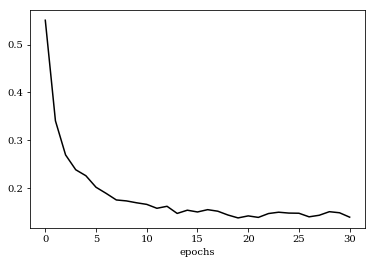

In [3]:
'''
学習の進み具合を可視化
'''
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(val_loss)), val_loss, label='loss', color='black')
plt.xlabel('epochs')
plt.show()